In [8]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [3]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [4]:
mongo_db = mongo_conn['spearmint']

In [5]:
mongo_db.list_collection_names()

[u'mix_cosines_2-87.start-time',
 u'branin_3-43.recommendations',
 u'PESC-toy-problem_2-10.hypers',
 u'branin-constrained-example2-19.jobs',
 u'mix_cosines_1-27.start-time',
 u'levy_1-87.recommendations',
 u'branin_1-29.recommendations',
 u'levy_1-91.hypers',
 u'mix_cosines_1-77.jobs',
 u'mix_cosines_3-57.recommendations',
 u'PESC-toy-problem_3-11.hypers',
 u'branin_1-28.start-time',
 u'branin_2-44.hypers',
 u'levy_1-59.jobs',
 u'mix_cosines_3-88.start-time',
 u'levy_1-13.start-time',
 u'branin_4-37.start-time',
 u'mix_cosines_3-29.hypers',
 u'branin_1-94.start-time',
 u'PESC-toy-problem-9.jobs',
 u'mix_cosines_1-68.jobs',
 u'mix_cosines_1-45.jobs',
 u'mix_cosines_2-39.recommendations',
 u'PESC-toy-problem_4-2.hypers',
 u'branin_4-74.start-time',
 u'branin_4-84.jobs',
 u'levy_1-6.recommendations',
 u'branin-constrained-example2-13.jobs',
 u'mix_cosines_2-81.jobs',
 u'branin_1-72.hypers',
 u'mix_cosines_3-26.jobs',
 u'mix_cosines_1-85.recommendations',
 u'branin_3-19.jobs',
 u'PESC-toy-

### Loading document from database

In [27]:
jobs1_exp = []
jobs2_exp = []
jobs3_exp = []

recomm1_exp = []
recomm2_exp = []
recomm3_exp = []

for i in range(100):
    jobs1_exp.append(mongo_db["mix_cosines_1-%d.jobs"%i])
    jobs2_exp.append(mongo_db["mix_cosines_2-%d.jobs"%i])
    jobs3_exp.append(mongo_db["mix_cosines_3-%d.jobs"%i])
    
    recomm1_exp.append(mongo_db["mix_cosines_1-%d.recommendations"%i])
    recomm2_exp.append(mongo_db["mix_cosines_2-%d.recommendations"%i])
    recomm3_exp.append(mongo_db["mix_cosines_3-%d.recommendations"%i])

In [31]:
mix_cosine1_objs = functions.get_objective(recomm1_exp)
mix_cosine2_objs = functions.get_objective(recomm2_exp)
mix_cosine3_objs = functions.get_objective(recomm3_exp)

In [33]:
mix_cosine1_objs = np.average(mix_cosine1_objs, axis = 0)
mix_cosine2_objs = np.average(mix_cosine2_objs, axis = 0)
mix_cosine3_objs = np.average(mix_cosine3_objs, axis = 0)

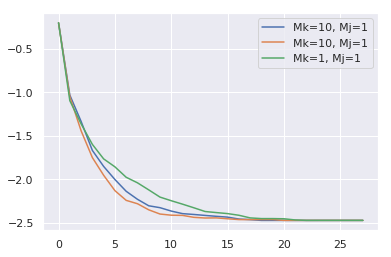

In [34]:
plt.plot(mix_cosine1_objs[:-2],label='Mk=10, Mj=1')
plt.plot(mix_cosine2_objs[:-2],label='Mk=10, Mj=1')
plt.plot(mix_cosine3_objs[:-2],label='Mk=1, Mj=1')
plt.legend()

### Getting Immediate Regret IR measure

In [38]:
def mix_cosines(x1,x2):
	u = 1.6 * x1 - 0.5
	v = 1.6 * x2 - 0.5

	element2 = u**2 + v**2 - 0.3 * np.cos(3*np.pi*u) - 0.3 * np.cos(3*np.pi*v) + 0.7

	result = 1 - element2

	return result

In [35]:
opt_val = -2.5

In [37]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - mix_cosines(*input_list)))

In [39]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for locs in locs_cur_exp:
            irs_iter.append(log_ir(locs))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [40]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs



In [41]:
def get_avg_irs2(irs_exp):
    avg_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs

In [42]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs

In [43]:
def get_median_irs2(irs_exp):
    median_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs

In [44]:
locs1_exp = functions.get_recomm(recomm1_exp)
locs2_exp = functions.get_recomm(recomm2_exp)
locs3_exp = functions.get_recomm(recomm3_exp)

In [45]:
irs1_exp = get_irs_whole_exp(locs1_exp)
irs2_exp = get_irs_whole_exp(locs2_exp)
irs3_exp = get_irs_whole_exp(locs3_exp)

In [46]:
irs1_median = get_median_irs(irs1_exp)
irs2_median = get_median_irs(irs2_exp)
irs3_median = get_median_irs(irs3_exp)

In [47]:
irs1_avg = get_avg_irs(irs1_exp)
irs2_avg = get_avg_irs(irs2_exp)
irs3_avg = get_avg_irs(irs3_exp)

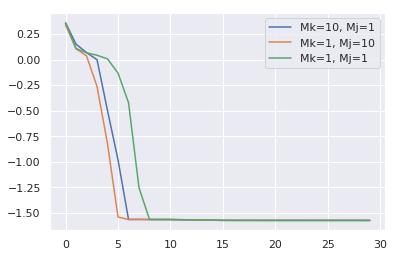

In [48]:
plt.plot(irs1_median, label = 'Mk=10, Mj=1')
plt.plot(irs2_median, label = 'Mk=1, Mj=10')
plt.plot(irs3_median, label = 'Mk=1, Mj=1')
plt.legend()

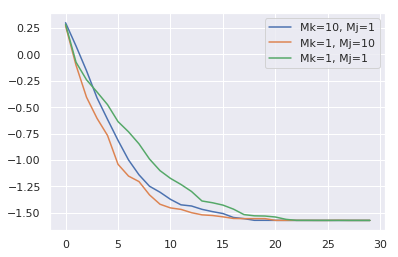

In [49]:
plt.plot(irs1_avg, label = 'Mk=10, Mj=1')
plt.plot(irs2_avg, label = 'Mk=1, Mj=10')
plt.plot(irs3_avg, label = 'Mk=1, Mj=1')
plt.legend()